DANH SÁCH THÀNH VIÊN NHÓM 16

- K204110562 - Lê Thảo Giang
- K204110567 - Phạm Thị Minh Hòa
- K204110586 - Lê Phước Toàn
- K204110588 - Nguyễn Thị Bảo Trâm
- K204111792 - Thẩm Thị Tú Uyên


# Mô tả bài toán

Youtube là một trong những nền tảng thịnh hành phù hợp với xu hướng người xem dưới dạng video, việc phân tích những nội dung trên Youtube, các hành vi tương tác người dùng đều rất quan trọng. Từ bộ dữ liệu có được, bài toán đặt ra là cần phân tích những nội dung trên youtube, sự tương tác và thời gian cho những video đó ra sao, phân tích và đưa ra insight cho những nhà quản trị/ sáng tạo nội dung để sản xuất những video phù hợp.

Câu hỏi bài toán

- Những thông số, thời gian về những video xu hướng đang là như thế nào?
- Sự tương tác với các video theo những nội dung khác nhau, thời gian khác nhau có ảnh hưởng ra sao?
- Những kênh nào đang dành được nhiều sự quan tâm?
- Những thể loại video nào được xem và sản xuất nhiều nhất?
- Độ dài và độ phổ biến của title, từ khoá sẽ ảnh hưởng đến video như thế nào?
- Số lượng video cho mỗi chủ đề liệu có là vấn đề cần phân tích?

###Mô tả dữ liệu

Tập dữ liệu được lấy trên kaggle được những kỹ thuật viên cào và update liên tục từ nền tảng Youtube. (Thu thập các Video trên Top Trending US từ ngày 12/8/2020 đến ngày 13/10/2023)

Tập dữ liệu trong bài toán bao gồm 231787 dòng và 16 trường dữ liệu:

- video_id: mã video
- title: tên video
- publishedAt: thời gian đăng tải/ sản xuất video
- channelId: mã kênh
- channelTitle: tên kênh
- categoryId: mã thể loại (có 44 thể loại)
- trending_date: thời gian xu hướng
- tags: các nhãn/ tag cho video
- view_count: số lượng lượt xem mỗi video
- likes: số lượng lượt yêu thích mỗi video
- dislikes: số lượng lượt không yêu thích
- comment_count: số lượng bình luận
- thumbnail_link: liên kết đến hình bìa của video
- comments_disabled: vô hiệu bình luận  (true/false)
- ratings_disabled:  vô hiệu rating (true/false)
- description: mô tả nội dung video

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Data preprocessing

- Kiểm tra Data Type
- Kiểm tra và xử lý giá trị Null và Duplicated
- Đọc dữ liệu từ File JSON và nối với bảng hiện tại (category)
- Kiểm tra dữ liệu bất thường
- Xóa bỏ các cột, các dòng dữ liệu không cần thiết cho quá trình phần tích

In [ ]:
df=pd.read_csv('US_youtube_trending_data.csv')
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231782,5GOxXM_HCRM,Minecraft Live 2023: Which mob will you vote for?,2023-10-06T15:00:05Z,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,20,2023-10-13T00:00:00Z,Minecraft|Minecraft Live|Mob vote|Vote for new...,2062110,125205,0,30768,https://i.ytimg.com/vi/5GOxXM_HCRM/default.jpg,False,False,Thanks to the three new mobs that want to join...
231783,XgW6AxYFVz8,Assassin's Creed: Mirage - Before You Buy,2023-10-04T21:17:43Z,UCNvzD7Z-g64bPXxGzaQaa4g,gameranx,20,2023-10-13T00:00:00Z,AC mirage|assassin's creed mirage|assassin's c...,1447534,43303,0,4991,https://i.ytimg.com/vi/XgW6AxYFVz8/default.jpg,False,False,"Assassin's Creed: Mirage (PC, PS5, Xbox Series..."
231784,UnYFuK0MvvM,"PENGUIN, ARMADILLO, CRAB - Minecraft Mob Vote ...",2023-10-05T16:43:14Z,UCsuKgiVb2KJ2sZdrrwoAqsA,wattles,20,2023-10-13T00:00:00Z,minecraft mob vote|minecraft mob vote 2023|min...,216043,13014,0,3793,https://i.ytimg.com/vi/UnYFuK0MvvM/default.jpg,False,False,the minecraft 1.21 mob vote is here! introduci...
231785,28JB7rmFBXk,There's a TROLL in the Dungeon! And Its ME! - ...,2023-10-05T14:00:04Z,UC4YUKOBld2PoOLzk0YZ80lw,Tango Tek,20,2023-10-13T00:00:00Z,[None],276897,24500,0,1285,https://i.ytimg.com/vi/28JB7rmFBXk/default.jpg,False,False,DECKED OUT MERCH IS HERE!Pick up an AMAZING De...


## Check Data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231787 entries, 0 to 231786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           231787 non-null  object
 1   title              231787 non-null  object
 2   publishedAt        231787 non-null  object
 3   channelId          231787 non-null  object
 4   channelTitle       231787 non-null  object
 5   categoryId         231787 non-null  int64 
 6   trending_date      231787 non-null  object
 7   tags               231787 non-null  object
 8   view_count         231787 non-null  int64 
 9   likes              231787 non-null  int64 
 10  dislikes           231787 non-null  int64 
 11  comment_count      231787 non-null  int64 
 12  thumbnail_link     231787 non-null  object
 13  comments_disabled  231787 non-null  bool  
 14  ratings_disabled   231787 non-null  bool  
 15  description        227373 non-null  object
dtypes: bool(2), int64(5)

In [ ]:
# Change the type of publishedAt and trending_date to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['published_weekday'] = df['publishedAt'].dt.day_name()
df['publish_year'] = df['publishedAt'].dt.year

## Check null and duplicated values

In [ ]:
# Check duplicate value
df.duplicated().sum()

83

In [ ]:
#delete duplicate value
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# Check Null value
null_values = pd.DataFrame({'Number': df.isnull().sum(), 'Percentage': (df.isnull().sum()/df.shape[0])*100})
null_values

,Number,Percentage
video_id,0,0.000000
title,0,0.000000
publishedAt,0,0.000000
channelId,0,0.000000
channelTitle,0,0.000000
categoryId,0,0.000000
trending_date,0,0.000000
tags,0,0.000000
view_count,0,0.000000
likes,0,0.000000


In [ ]:
df.description= df.description.fillna('No description provided')

In [ ]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
published_weekday    0
publish_year         0
dtype: int64

## Lookup categoryID in JSON file

In [ ]:
with open("US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [ ]:
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
ID_to_Category.keys()

dict_keys([1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [ ]:
with open('id_to_categori.json', 'w') as outfile:
    json.dump(ID_to_Category, outfile)

In [ ]:
df['categoryId'] = df['categoryId'].apply(lambda x: ID_to_Category[x])
df.head(n=2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,published_weekday,publish_year
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Tuesday,2020
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Tuesday,2020


In [ ]:
df['categoryId'].unique()

array(['People & Blogs', 'Gaming', 'Entertainment', 'Music',
       'Howto & Style', 'Education', 'Comedy', 'Science & Technology',
       'Film & Animation', 'News & Politics', 'Sports', 'Travel & Events',
       'Pets & Animals', 'Autos & Vehicles', 'Nonprofits & Activism'],
      dtype=object)

In [ ]:
#rename categoryId to category
df.rename(columns={'categoryId':'category'}, inplace=True)

## Describe data

In [ ]:
# Describe numerical data
df.describe()

,view_count,likes,dislikes,comment_count,publish_year
count,2.317040e+05,2.317040e+05,231704.000000,2.317040e+05,231704.000000
mean,2.592521e+06,1.294361e+05,1315.294276,1.047915e+04,2021.671905
std,7.846140e+06,4.220514e+05,8653.362411,7.693580e+04,0.973774
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2020.000000
25%,4.750558e+05,1.815000e+04,0.000000,1.304000e+03,2021.000000
50%,9.489315e+05,4.124450e+04,0.000000,2.842000e+03,2022.000000
75%,2.130393e+06,1.017875e+05,639.000000,6.632000e+03,2022.000000
max,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06,2023.000000


Có một số dữ liệu bất thường khi giá trị nhỏ nhất của viewCount là 0. Chúng ta sẽ kiểm tra các dòng này

In [ ]:
df[df['view_count']==0]

,video_id,title,publishedAt,channelId,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,published_weekday,publish_year
15289,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25 01:40:31+00:00,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,Entertainment,2020-10-27 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4257,384,240,https://i.ytimg.com/vi/r7nYQXsxJdU/default.jpg,False,False,HBCU Homecoming 2020 is going down! We welcome...,Sunday,2020
15577,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25 01:40:31+00:00,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,Entertainment,2020-10-29 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4420,388,261,https://i.ytimg.com/vi/r7nYQXsxJdU/default.jpg,False,False,HBCU Homecoming 2020 is going down! We welcome...,Sunday,2020
18799,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14 22:39:13+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,Music,2020-11-15 00:00:00+00:00,[None],0,0,0,0,https://i.ytimg.com/vi/AWXvClaRtsI/default.jpg,True,True,In honor of Native American Heritage Month in ...,Saturday,2020
19027,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14 22:39:13+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,Music,2020-11-16 00:00:00+00:00,[None],0,0,0,0,https://i.ytimg.com/vi/AWXvClaRtsI/default.jpg,True,True,In honor of Native American Heritage Month in ...,Saturday,2020
19264,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14 22:39:13+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,Music,2020-11-17 00:00:00+00:00,[None],0,0,0,0,https://i.ytimg.com/vi/AWXvClaRtsI/default.jpg,True,True,In honor of Native American Heritage Month in ...,Saturday,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200287,LHCTW4pckDo,Live at the Met Gala With Vogue,2023-05-02 01:36:13+00:00,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,Howto & Style,2023-05-06 00:00:00+00:00,vogue|met gala|emma chamberlain|metgala23-live...,0,94923,0,1819,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos...",Tuesday,2023
200521,LHCTW4pckDo,Live at the Met Gala With Vogue,2023-05-02 01:36:13+00:00,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,Howto & Style,2023-05-07 00:00:00+00:00,vogue|met gala|emma chamberlain|metgala23-live...,0,96043,0,1856,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos...",Tuesday,2023
200735,LHCTW4pckDo,Live at the Met Gala With Vogue,2023-05-02 01:36:13+00:00,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,Howto & Style,2023-05-08 00:00:00+00:00,vogue|met gala|emma chamberlain|metgala23-live...,0,96843,0,1902,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos...",Tuesday,2023
200970,LHCTW4pckDo,Live at the Met Gala With Vogue,2023-05-02 01:36:13+00:00,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,Howto & Style,2023-05-09 00:00:00+00:00,vogue|met gala|emma chamberlain|metgala23-live...,0,97284,0,1920,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos...",Tuesday,2023


Đối với các dữ liệu này, chúng ta sẽ xóa bỏ khỏi tập dữ liệu

In [ ]:
# delete row with view_count = 0
df.drop(df[df['view_count']==0].index, inplace=True)

## Remove unnecessary columns

In [ ]:
df.drop(['thumbnail_link'], axis=1, inplace=True)

## Handle disabed comments and disabed ratings

In [ ]:
# check what percent of videos have comments / likes disabled
commentsDisabled = len(df.loc[df['comments_disabled'] == True]) / len(df)
likesDisabled = len(df.loc[df['ratings_disabled'] == True]) / len(df)

print(str(round(commentsDisabled * 100, 2)) + "% of videos have comments disabled.")
print(str(round(likesDisabled * 100, 2)) + "% of videos have likes disabled.")

1.32% of videos have comments disabled.
0.56% of videos have likes disabled.


Tỷ lệ các video bị tắt comment và rating là rất thấp, chúng ta sẽ xóa bỏ các dòng này và cả hai cột

In [ ]:
# drop records that have comments disabled and likes disabled
df.drop(df[df['comments_disabled'] == True].index, inplace=True)
df.drop(df[df['ratings_disabled'] == True].index, inplace=True)
# drop comments_disabled and ratings_disabled columns
df.drop(['comments_disabled', 'ratings_disabled'], axis=1, inplace=True)

In [ ]:
df

,video_id,title,publishedAt,channelId,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,description,published_weekday,publish_year
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Tuesday,2020
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",Tuesday,2020
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,Tuesday,2020
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Tuesday,2020
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,Tuesday,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231782,5GOxXM_HCRM,Minecraft Live 2023: Which mob will you vote for?,2023-10-06 15:00:05+00:00,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,Gaming,2023-10-13 00:00:00+00:00,Minecraft|Minecraft Live|Mob vote|Vote for new...,2062110,125205,0,30768,Thanks to the three new mobs that want to join...,Friday,2023
231783,XgW6AxYFVz8,Assassin's Creed: Mirage - Before You Buy,2023-10-04 21:17:43+00:00,UCNvzD7Z-g64bPXxGzaQaa4g,gameranx,Gaming,2023-10-13 00:00:00+00:00,AC mirage|assassin's creed mirage|assassin's c...,1447534,43303,0,4991,"Assassin's Creed: Mirage (PC, PS5, Xbox Series...",Wednesday,2023
231784,UnYFuK0MvvM,"PENGUIN, ARMADILLO, CRAB - Minecraft Mob Vote ...",2023-10-05 16:43:14+00:00,UCsuKgiVb2KJ2sZdrrwoAqsA,wattles,Gaming,2023-10-13 00:00:00+00:00,minecraft mob vote|minecraft mob vote 2023|min...,216043,13014,0,3793,the minecraft 1.21 mob vote is here! introduci...,Thursday,2023
231785,28JB7rmFBXk,There's a TROLL in the Dungeon! And Its ME! - ...,2023-10-05 14:00:04+00:00,UC4YUKOBld2PoOLzk0YZ80lw,Tango Tek,Gaming,2023-10-13 00:00:00+00:00,[None],276897,24500,0,1285,DECKED OUT MERCH IS HERE!Pick up an AMAZING De...,Thursday,2023


# EDA

In [ ]:
df['video_id'].nunique()

40977

Có tất cả 40977 video trending trên Youtube.
Đối chiếu với tập dữ liệu, có thể thấy, có rất nhiều video đạt top trending trong nhiều ngày.
Trong quá trình nghiên cứu, phụ thuộc vào mục tiêu phân tích, nhóm sẽ có những xử lý khác nhau đối với các video này

Nhóm quyết định sẽ sao chép và tạo một tập dữ liệu mới, chỉ lấy các video riêng biệt để phân tích đặc điểm của các video trending, đối với các video có nhiều ngày trending, nhóm sẽ lấy ngày cuối cùng trending của video đó.

In [ ]:
unique_video = df.sort_values(by=['video_id','trending_date'])
unique_video = unique_video.groupby('video_id').last().reset_index()
unique_video

,video_id,title,publishedAt,channelId,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,description,published_weekday,publish_year
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,Music,2021-06-15 00:00:00+00:00,Migos|Avalanche|Quality|Control|Music/Motown|R...,6823249,262692,4107,16445,Watch the the official video for Migos - Avala...,Thursday,2021
1,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,Entertainment,2022-03-15 00:00:00+00:00,[None],538485,17290,0,1439,No description provided,Wednesday,2022
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20 01:03:32+00:00,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,Entertainment,2021-09-25 00:00:00+00:00,[None],682609,8029,369,723,Hannah Waddingham wins the Emmy for Supporting...,Monday,2021
3,--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25 00:30:17+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,Sports,2022-12-26 00:00:00+00:00,[None],1280997,14603,0,2078,Check out our other channels:NFL Mundo https:/...,Sunday,2022
4,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,Education,2021-12-11 00:00:00+00:00,retaining wall|New Jersey highway|Direct Conne...,623949,29991,320,998,One of the most important (and innocuous) part...,Tuesday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40972,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,2021-02-12 05:03:49+00:00,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,Music,2021-02-21 00:00:00+00:00,Lil Tjay|Steady Calling My Phone|Calling My Ph...,13974461,728439,7579,57012,Official audio for Calling My Phone by Lil Tja...,Friday,2021
40973,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,2021-01-16 05:39:05+00:00,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,Sports,2021-01-18 00:00:00+00:00,NBA|G League|Basketball|game-0022000187|Lakers...,2598512,20024,989,2872,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Saturday,2021
40974,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,Music,2021-06-09 00:00:00+00:00,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,9389223,584431,3403,77267,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Wednesday,2021
40975,zzsIqPVv2Q4,I Survived 100 DAYS as a SLIME in HARDCORE Min...,2022-04-29 21:45:01+00:00,UCYPYEhWUvvKFgmgkLACagXA,MaxCraft,Gaming,2022-05-05 00:00:00+00:00,maxcraft|minecraft maxcraft|100 days minecraft...,3079200,70776,0,2061,I Survived 100 DAYS as a SLIME in HARDCORE MIN...,Friday,2022


In [ ]:
custom_colors = ['#221f1f', '#666666', '#b20710', '#FF0000','#f5f5f1']

## 1. Trending videos

### Top 10 trending videos with highest view_count, likes

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-p

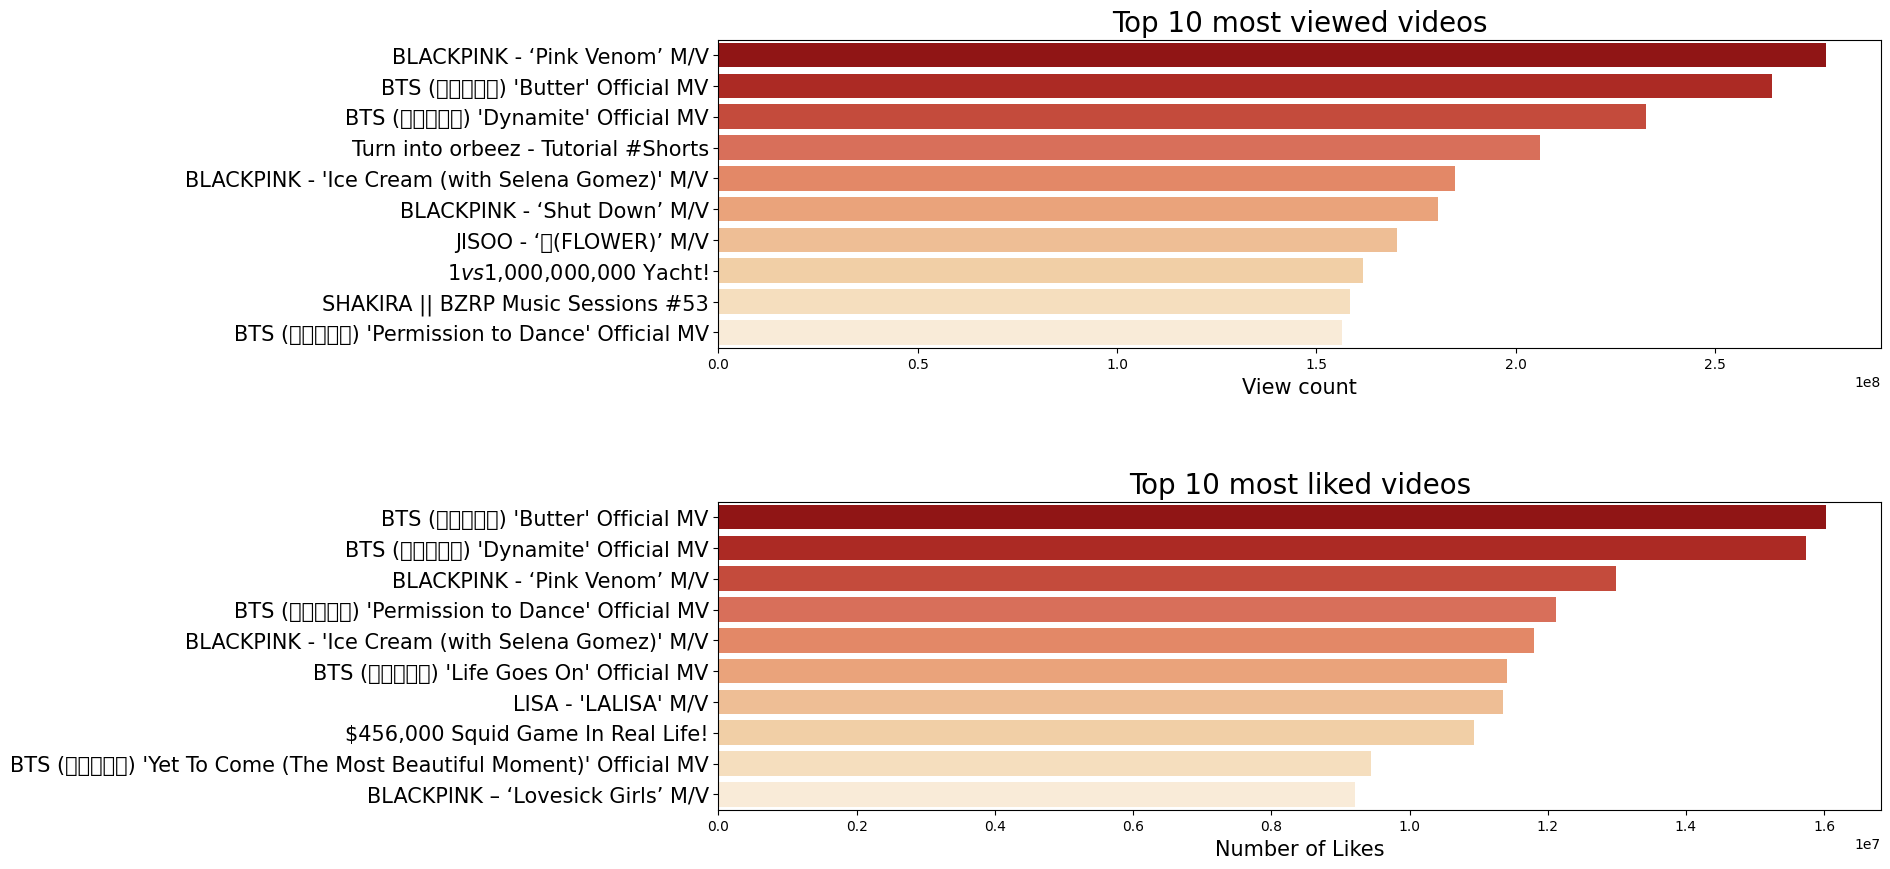

In [ ]:
top10_views = unique_video.sort_values(by='view_count', ascending=False).head(10)
top10_likes = unique_video.sort_values(by='likes', ascending=False).head(10)
top10_cmt = unique_video.sort_values(by='comment_count', ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(x='view_count', y='title', data=top10_views, palette='OrRd_r')
plt.title('Top 10 most viewed videos', size=20)
plt.xlabel('View count', size=15)
plt.ylabel('', size = 15)
plt.yticks(size=15)

plt.subplot(2,1,2)
sns.barplot(x='likes', y='title', data=top10_likes, palette='OrRd_r')
plt.title('Top 10 most liked videos', size=20)
plt.xlabel('Number of Likes', size=15)
plt.ylabel('', size = 15)
plt.yticks(size=15)

plt.subplots_adjust(hspace=0.5)

plt.show()

Từ biểu đồ trên có thể thấy các video thuộc Top 10 có số lượt xem từ 150 triệu đến 280 triệu. Trong đó, 3 video có số lượt xem cao nhất lần lượt là "Pink Venom" (BlackPink) với 280 triệu lượt xem, "Butter" và
 (BTS) với 270 triệu lượt xem và "Dynamite" (BTS) với 230 triệu lượt xem. Các video trên đồng thời cũng là top 3 video có số lượt like cao nhất với thứ tự cao nhất là Butter (1) với 16 triệu lượt thích, Dynamite (2) với 15 triệu lượt thích và Pink Venom (3) với 13 triệu lượt thích.

### Top 10 videos that on top trending for a long time

In [ ]:
# create the first_date_trending dataframe which contains the first trending date of each video
first_date_trending = df.sort_values(by=['video_id','trending_date'])
first_date_trending = first_date_trending.drop_duplicates(subset='video_id', keep='first')
# rename the trending_date to first_trending_date
first_date_trending.rename(columns={'trending_date':'first_trending_date'}, inplace=True)

In [ ]:
# merge the first_date_trending dataframe to the unique_video dataframe by video_id
first_date_trending = pd.merge(unique_video, first_date_trending[['video_id','first_trending_date']], on='video_id')
# calculate the trending duration by subtracting the first_trending_date from the trending_date and convert it to integer
first_date_trending['trending_duration'] = (first_date_trending['trending_date'] - first_date_trending['first_trending_date']).dt.days.astype('int16')

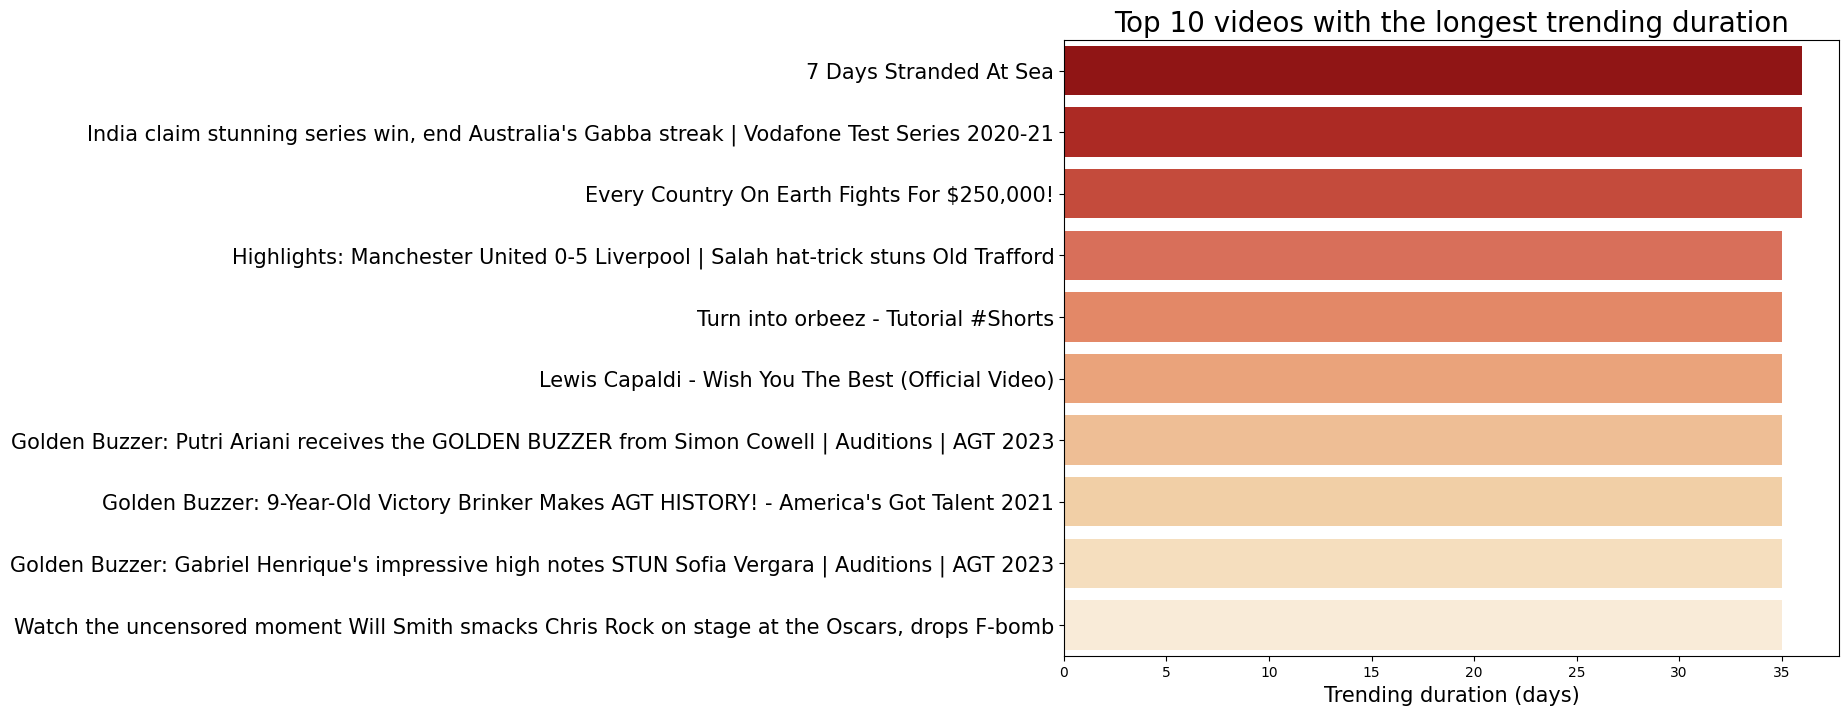

In [ ]:
# top 10 videos with the longest trending duration
top10_trending_time = first_date_trending.sort_values(by='trending_duration', ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='trending_duration', y='title', data=top10_trending_time, palette='OrRd_r')
plt.title('Top 10 videos with the longest trending duration', size=20)
plt.ylabel('')
plt.xlabel('Trending duration (days)', size=15)
plt.yticks(size=15)
plt.show()

Top 3 MV "7 Days Stranded At", "India claim stunning series win, end Australia's Gabba streak", "Every Country On Earth Fights For $250,000!" là các MV có thời gian trending lâu nhất với thời gian nằm trên top trending là 37 ngày. Các video còn lại trong top 10 có thời gian trending kéo dài trong vòng 35 ngày.

### Trend duration and time_to_trend distribution

In [ ]:
# Calculate time_to_trend
time_to_trend = df.sort_values(by=['video_id','trending_date'])
time_to_trend= time_to_trend.drop_duplicates(subset='video_id', keep='first')
time_to_trend['publishedAt'] = time_to_trend['publishedAt'].dt.date
time_to_trend['trending_date'] = time_to_trend['trending_date'].dt.date

time_to_trend['trending_date'] = pd.to_datetime(time_to_trend['trending_date'])
time_to_trend['publishedAt'] = pd.to_datetime(time_to_trend['publishedAt'])

time_to_trend['time_to_trend'] = (time_to_trend['trending_date'] - time_to_trend['publishedAt']).dt.days.astype('int16')

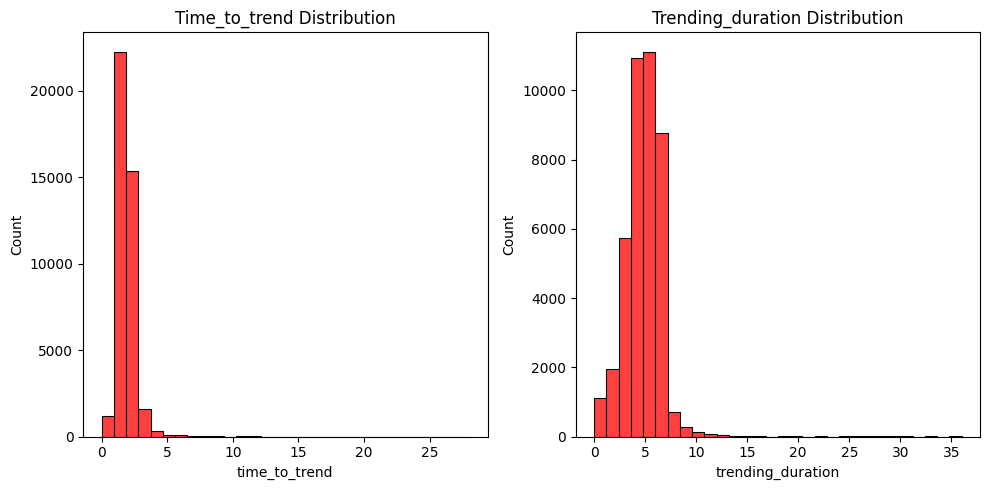

In [ ]:
# Time_to_trend distribution
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(time_to_trend.time_to_trend, bins=30, color=custom_colors[3])
plt.title('Time_to_trend Distribution')

# Trend duration distribution
plt.subplot(1,2,2)
sns.histplot(first_date_trending.trending_duration, bins=30, color=custom_colors[3])
plt.title('Trending_duration Distribution')
plt.tight_layout()

plt.show()

Thời gian lên xu hướng của các video phần lớn nằm trong khoảng từ 0 -5 ngày. Trong đó, các video lên xu hướng trong vòng từ 1 ngày chiếm số lượng nhiều nhất (khoảng 22000 video).

Bên cạnh đó, thời gian nằm trên top trending của các video rơi vào khoảng 0 - 12 ngày là chủ yếu. Trong đó, các video nằm trên Top thịnh hành trong vòng 5 ngày chiếm số lượng nhiều nhất với khoảng 11000 video.

## 2. Videos over time

### Number of videos trending over time

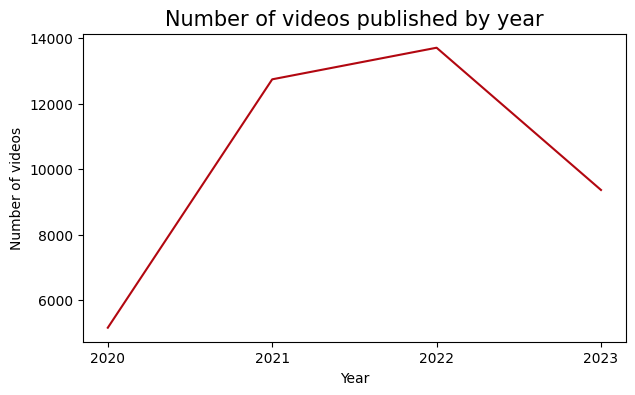

In [ ]:
# create line chart show number of videos published by year
plt.figure(figsize=(7,4))
unique_video['publish_year'].value_counts().sort_index().plot(kind='line', color=custom_colors[2])
plt.title('Number of videos published by year', size=15)
plt.xlabel('Year', size=10)
plt.ylabel('Number of videos', size=10)
plt.xticks(unique_video['publish_year'].unique())
plt.show()


Số lượng video xuất bản từ năm 2020 - 2023 thay đổi liên tục và không đồng đều. Số lượng video được phát hành tăng mạnh từ 2020 - 2021. Từ năm 2021 - 2022, mặc dù có tăng nhưng không mạnh mẽ như các năm trước.

### Videos publish by weekday

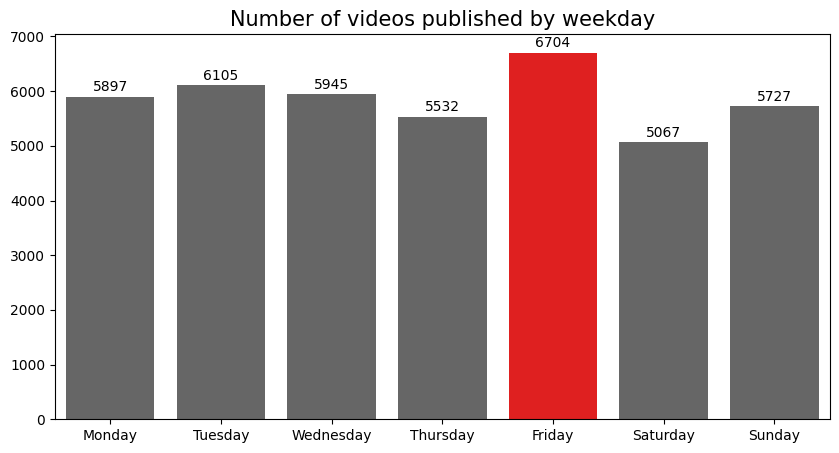

In [ ]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

color_map2 = [custom_colors[1] for _ in range(7)]
color_map2[4]  = custom_colors[3]

plt.figure(figsize=(10,5))
sns.countplot(data=unique_video, x='published_weekday', order=weekday_order, palette=color_map2)
plt.xlabel('', fontsize=10)
plt.ylabel('', fontsize=10)
plt.xticks(size=10)
plt.title('Number of videos published by weekday', fontsize=15)
# add number of videos on each bar
for i in range(7):
    count = unique_video[unique_video['published_weekday']==weekday_order[i]].shape[0]
    plt.text(i, count+100, count, ha = 'center', size=10)

plt.show()

Khi so sánh giữa các ngày khác nhau trong tuần, số lượng các video được phát hành chênh lệch không quá nhiều (từ 5067 đến 6704 video). Thứ 6 là ngày có số lượng video phát hành nhiều nhất với 6704 video.
Có thể thấy, khi phát hành vào thứ 6, video sẽ được tiếp cận và xem nhiều hơn do sau đó là cuối tuần, người xem có nhiều thời gian rảnh và có nhu cầu giải trí cao.

### Videos publish by hour

In [ ]:
df['publish_hour'] = df['publishedAt'].dt.hour

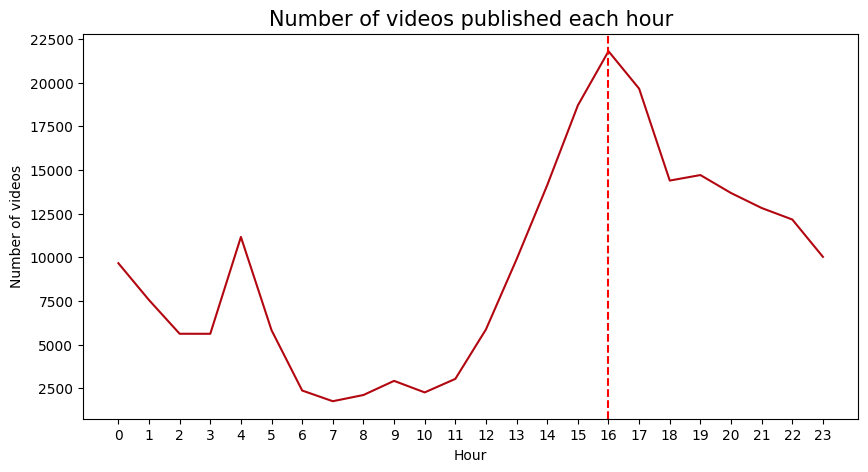

In [ ]:
# create line chart for number of videos by publish hour
plt.figure(figsize=(10,5))
df['publish_hour'].value_counts().sort_index().plot(kind='line', color=custom_colors[2])
plt.title('Number of videos published each hour', size=15)
plt.xlabel('Hour', size=10)
plt.ylabel('Number of videos', size=10)
plt.xticks(range(0,24))
# create the line for the highest point and show the name of the line
plt.axvline(x=16, color=custom_colors[3], linestyle='--',label='Peak point')
plt.show()

Khi so sánh giữa các thời điểm 1 video mới ra đời trong vòng 1 ngày, số lượng video mới xuất bản vào lúc 16 giờ chiếm nhiều nhất với khoảng 22000 video. Phần lớn các video xuất bản nhiều vào thời điểm chiều tối vì đây là thời điểm sau giờ hành chính nên người xem thường có nhiều thời gian rảnh theo dõi các MV nhất

## 3. Channel

##### Top 10 channels with the most trending videos

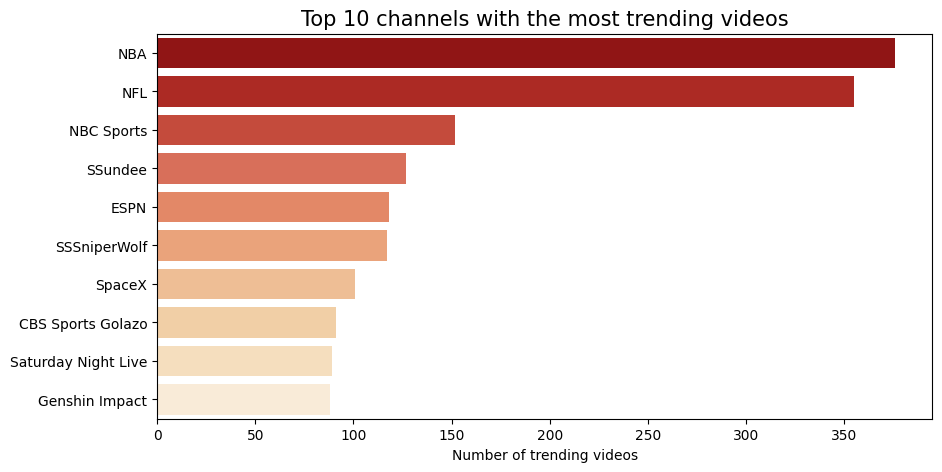

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='channelTitle', data=unique_video,order=unique_video['channelTitle'].value_counts().index[:10], palette='OrRd_r')
plt.title('Top 10 channels with the most trending videos', size=15)
plt.xlabel('Number of trending videos', size=10)
plt.ylabel('')
plt.xticks(size=10)
plt.show()

Top 10 kênh có số lượng trending video nhiều nhất rơi vào khoảng 80 đến 370 video. Trong đó, Top 3 các kênh có số lượng video trending nhiều nhất đều là các kênh thể thao. Cụ thể, NBA là kênh có số lượng video lên Top trending nhiều nhất với 370 video, tiếp theo là NFL với 350 video và NBC Sport với 150 video

##### Top 10 channels with highest average views, likes

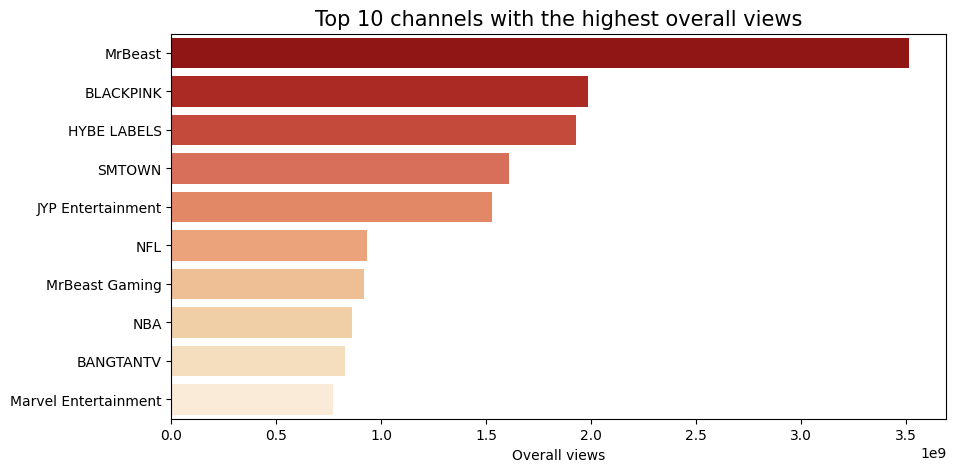

In [ ]:
# top 10 channel with highest overall views
# calculate the overall views for each channel
view_per_channel = unique_video.groupby('channelTitle')['view_count'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='view_count', y='channelTitle', data=view_per_channel.sort_values(by='view_count', ascending=False).head(10), palette='OrRd_r')
plt.title('Top 10 channels with the highest overall views', size=15)
plt.xlabel('Overall views', size=10)
plt.ylabel('')
plt.xticks(size=10)
plt.show()

Top 10 các kênh Youtube tổng lượt xem cao nhất phần lớn là các kênh giải trí, Kpop và kênh thể thao với khoảng từ 700 triệu lượt xem đến 3 tỷ 500 triệu lượt xem. Top 3 các kênh truyền hình có tổng số lượt xem cao nhất lần lượt là MrBeast (3.5 tỷ lượt xem), Blackpink (2 tỷ lượt xem) và Hype Labels (1.9 tỷ lượt xem)

### Top 3 channels with highest overall views per year


In [ ]:
# overall views of each channel in each year
view_per_channel_year = unique_video.groupby(['channelTitle','publish_year'])['view_count'].sum().reset_index()
view_per_channel_year
# just show the top 3 channel that have the highest overall views in each year
top3_view_per_channel_year = view_per_channel_year.groupby('publish_year').apply(lambda x: x.nlargest(3,'view_count')).reset_index(drop=True)
top3_view_per_channel_year

,channelTitle,publish_year,view_count
0,Big Hit Labels,2020,592955806
1,BLACKPINK,2020,477360899
2,MrBeast,2020,458158795
3,MrBeast,2021,988827379
4,HYBE LABELS,2021,776360214
5,SMTOWN,2021,654295184
6,MrBeast,2022,670161008
7,BLACKPINK,2022,645801717
8,HYBE LABELS,2022,453703884
9,MrBeast,2023,1401641769


Mặc dù có sự thay đổi về thứ hạng, 3 kênh truyền hình "HYBE LABELS", "BLackpink" và "MrBeast" vẫn là các kênh truyền hình dẫn đầu có tổng số lượt view nằm trong top cao nhất đều đặn qua các năm. Riêng năm 2023, BlackPink trượt khỏi top 3 và nhường vị trí lại có cho "DaFuqBoom!"

## 4. Category

### Number of videos in each category

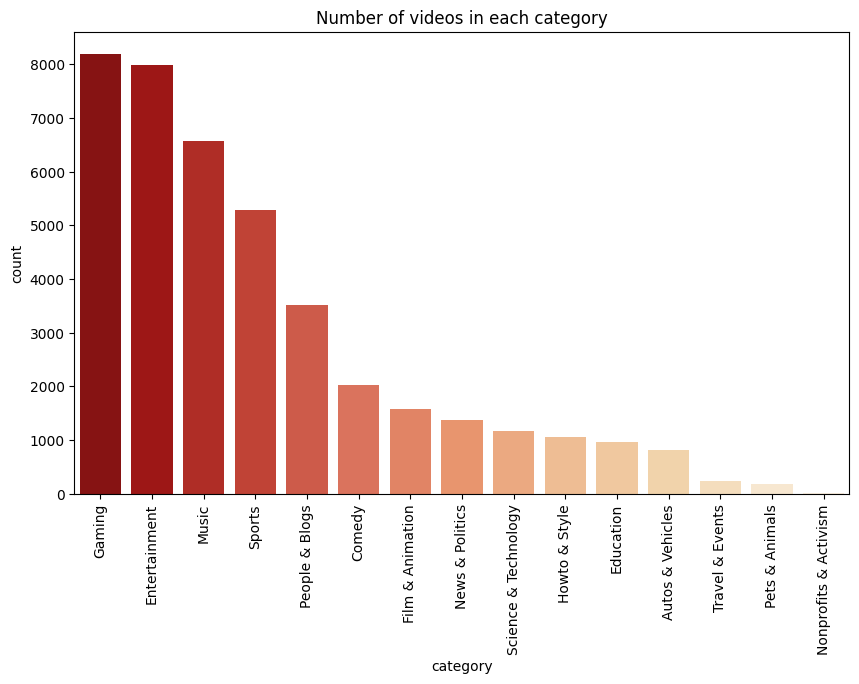

In [ ]:
#visualize the number of videos in each category
plt.figure(figsize=(10,6))
sns.countplot(x='category', data=unique_video, palette='OrRd_r',order=unique_video['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of videos in each category')
plt.show()

#### Dựa trên đồ thị về số lượng video trong các thể loại khác nhau, có thể có một số nhận xét đáng chú ý sau:

Những thể loại video như Gaming, Entertainment và Music có số lượng video lớn, với Gaming là thể loại phổ biến nhất với hơn 8000 video. Điều này cho thấy rằng nhu cầu trong lĩnh vực giải trí và nghệ thuật trên nền tảng này rất cao. Thể loại video liên quan đến giáo dục, khoa học và công nghệ và những lĩnh vực khác có số lượng video ít hơn, ít hơn 1000 videos.

Xu hướng sử dụng của người xem: Dựa vào sự phân phối này, có thể nói rằng người xem trên nền tảng này có sở thích chủ yếu trong lĩnh vực giải trí và nghệ thuật. Có thể có cơ hội để phát triển thêm nội dung liên quan đến giáo dục, khoa học và công nghệ để thu hút thêm người xem và mang lại giá trị cho cộng đồng.

### Average engagement of each category

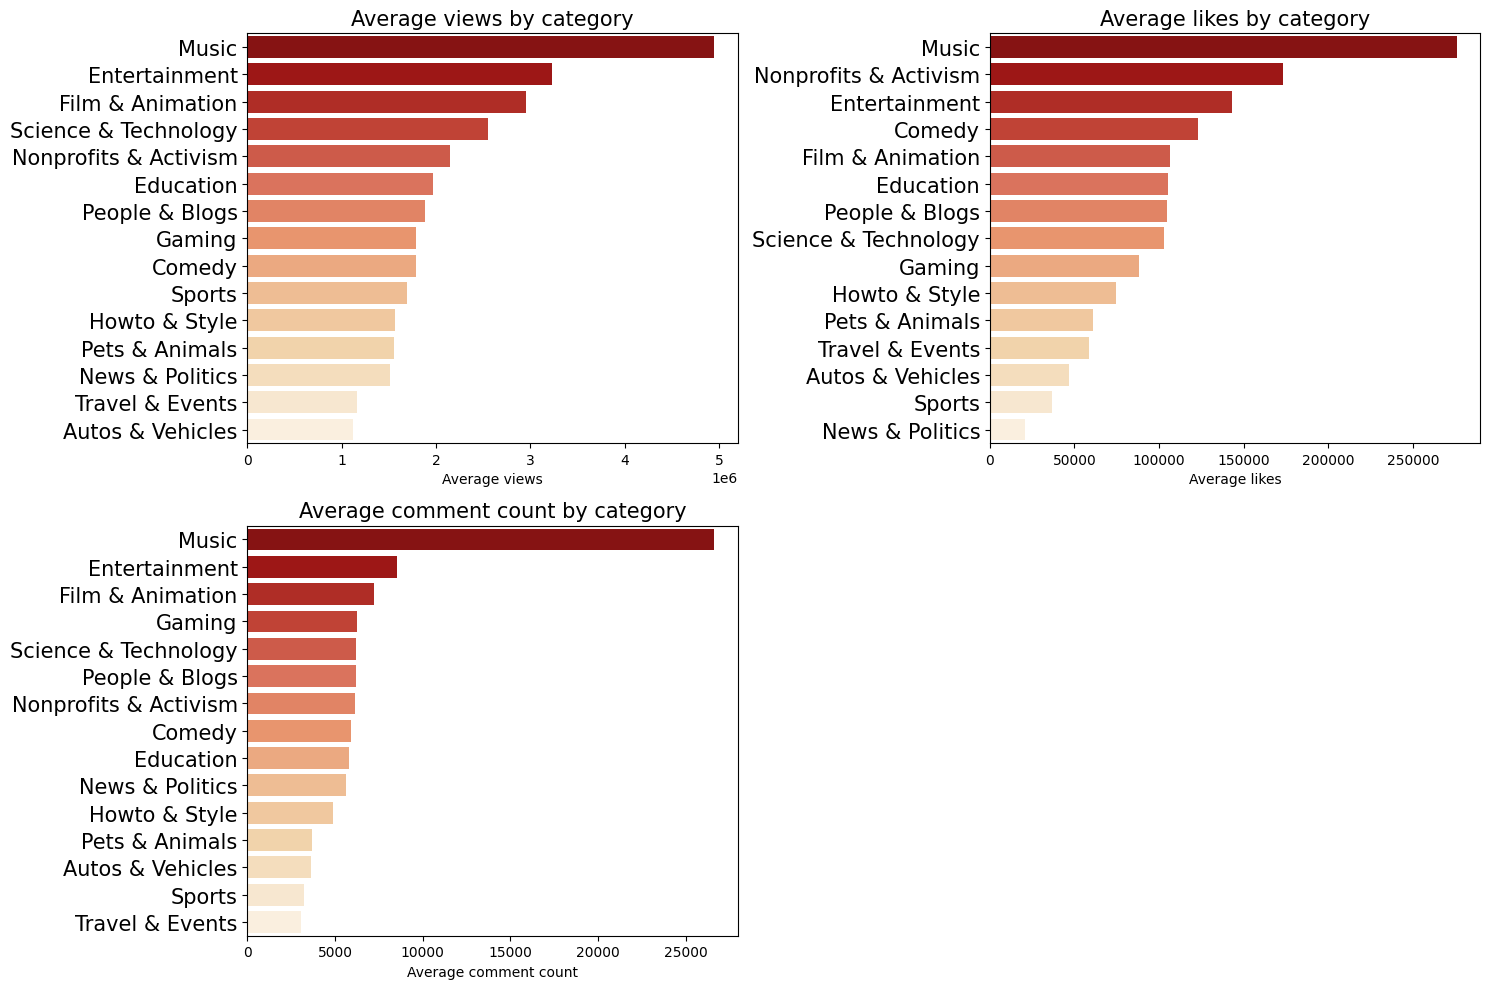

In [ ]:
# calculate average engagement by category
avg_engagement = unique_video.groupby('category')[['view_count','likes','comment_count']].mean().reset_index()
#draw 3 barplots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='view_count', y='category', data=avg_engagement, order=avg_engagement.sort_values('view_count',ascending=False).category, palette='OrRd_r')
plt.title('Average views by category', size=15)
plt.xlabel('Average views', size=10)
plt.ylabel('')
plt.yticks(size=15)

plt.subplot(2,2,2)
sns.barplot(x='likes', y='category', data=avg_engagement, order=avg_engagement.sort_values('likes',ascending=False).category, palette='OrRd_r')
plt.title('Average likes by category', size=15)
plt.xlabel('Average likes', size=10)
plt.ylabel('')
plt.yticks(size=15)

#move the third plot to center of the second row
plt.subplot(2,2,3)
sns.barplot(x='comment_count', y='category', data=avg_engagement, order=avg_engagement.sort_values('comment_count',ascending=False).category, palette='OrRd_r')
plt.title('Average comment count by category', size=15)
plt.xlabel('Average comment count', size=10)
plt.ylabel('')
plt.yticks(size=15)

plt.tight_layout()
plt.show()

#### Dựa trên đồ thị trên, nhận thấy rằng do số lượng video của mỗi category có sự chênh lệch, vậy nên nhóm sẽ lấy giá trị trung bình để đánh giá và có một số phân tích đáng chú ý sau:
Music thường nhận được một lượng lớn lượt xem vì âm nhạc là một dạng giải trí phổ biến và dễ tiếp cận. Và lĩnh vực này thường đi kèm với nhiều cảm xúc và mức độ tương tác cao. Người xem có xu hướng like và bình luận về âm nhạc mà họ yêu thích, bởi vì âm nhạc có sức mạnh kích thích cảm xúc và gây ấn tượng sâu sắc.

Những lĩnh vực khác:
Tùy thuộc vào sở thích và hành vi của người xem: Mức độ tương tác trong các lĩnh vực khác sẽ phụ thuộc vào nhiều yếu tố, bao gồm đối tượng mục tiêu, nội dung và phong cách thực hiện. Ví dụ, lĩnh vực Giải trí hay Phim ảnh có thể thu hút lượt comment nhiều hơn vì người xem muốn thảo luận và chia sẻ những trải nghiệm.

Cần phải lưu ý rằng cách tương tác có thể thay đổi theo thời gian và thị trường. Người xem có thể có sự thay đổi trong sở thích và thái độ tương tác theo từng thời kỳ.

### Top 5 Favorite categories of viewers over time

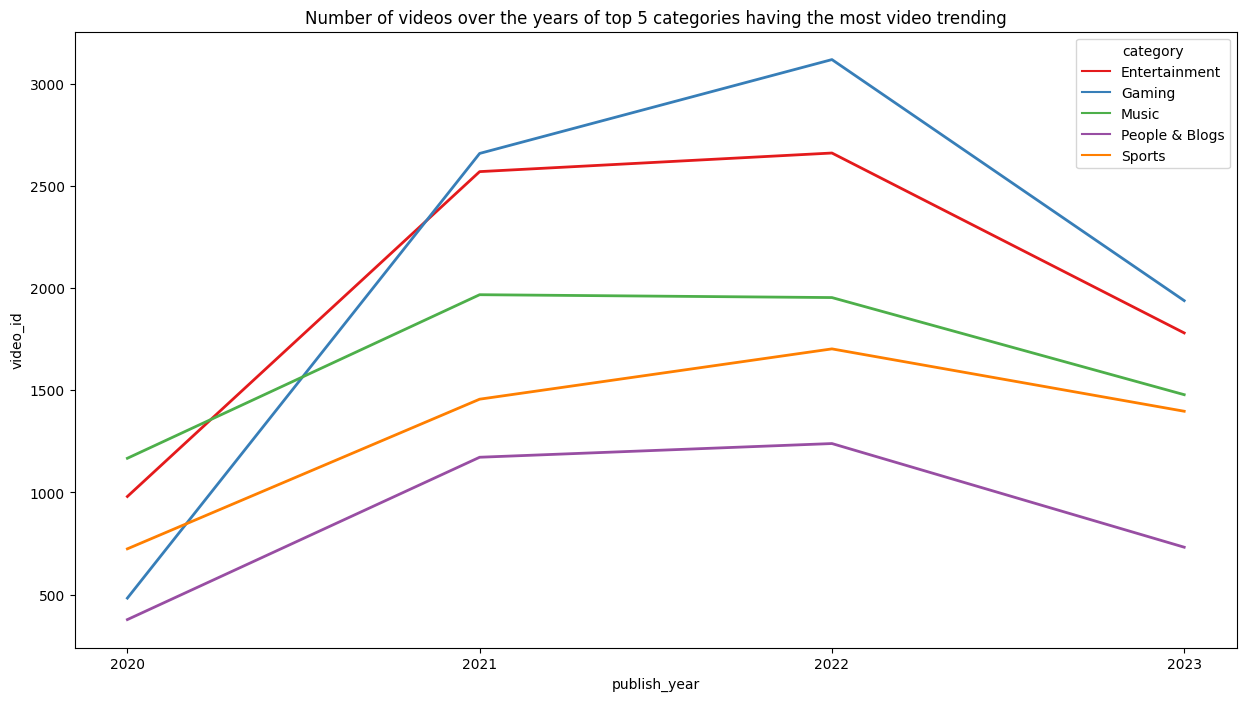

In [ ]:
##total video by year of each category
total_video_by_year = unique_video.groupby(['publish_year','category'])[['video_id']].count().reset_index()

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='publish_year', y='video_id', data=total_video_by_year[total_video_by_year['category'].isin(['Entertainment','Music','Sports','People & Blogs','Gaming'])], hue='category', palette='Set1', linewidth=2)
plt.title('Number of videos over the years of top 5 categories having the most video trending')
#year only in int type
plt.xticks(total_video_by_year['publish_year'].unique())
plt.show()

### Average views of top 5 Favorite categories of viewers over time

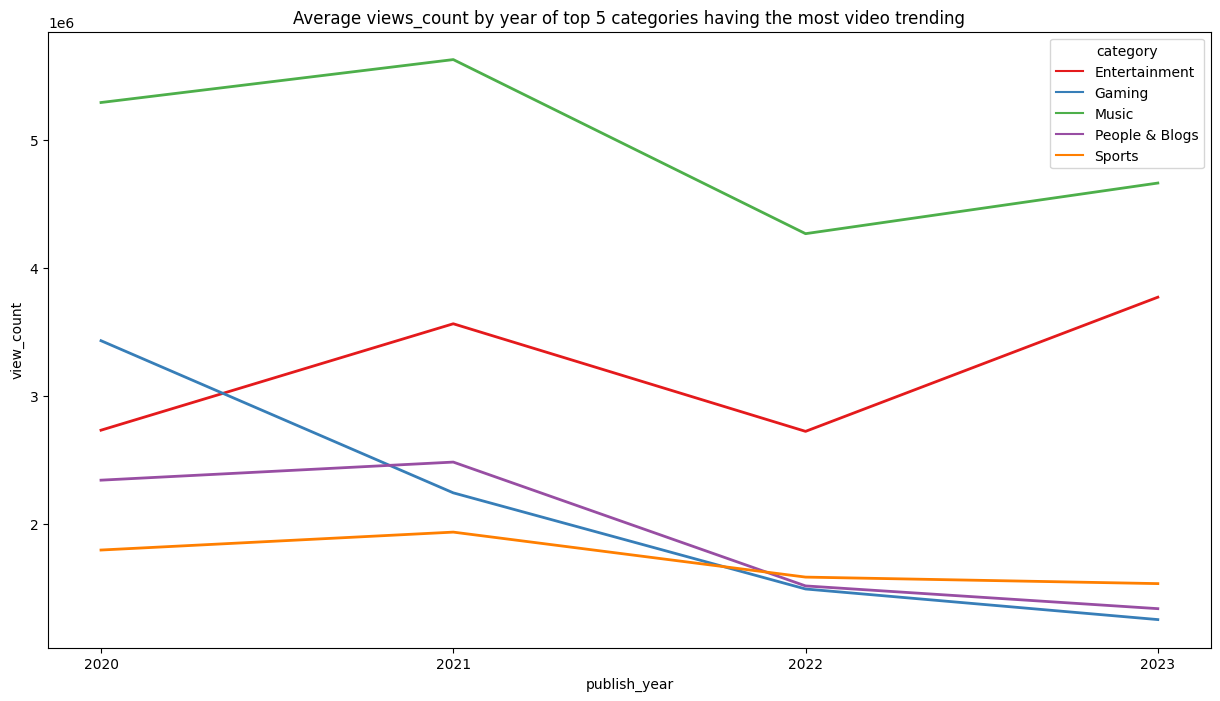

In [ ]:
#average views_count by year of each category
avg_views_by_year = unique_video.groupby(['publish_year','category'])[['view_count']].mean().reset_index()
#visualize
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='publish_year', y='view_count', data=avg_views_by_year[avg_views_by_year['category'].isin(['Entertainment','Music','Sports','People & Blogs','Gaming'])], hue='category', palette='Set1', linewidth=2)
plt.title('Average views_count by year of top 5 categories having the most video trending')
#year only in int type
plt.xticks(avg_views_by_year['publish_year'].unique())

plt.show()

#### Dựa trên đồ thị về Top 5 số lượng video nhiều nhất trong các thể loại qua các năm , có thể có một số nhận xét đáng chú ý sau:
Số lượng video trong lĩnh vực Gaming tăng mạnh vào năm 2021 và đứng đầu ở hàng mục này.
Tuy nhiên, đánh giá về lượt xem trung bình của từng danh mục sẽ nhận thấy sự khác biệt về mức độ tương tác của người xem. Cụ thể là như đồ thị bên dưới đây:
- Về Gaming: Tuy có số lượng video là nhiều nhất trong 5 hạng mục đáng chú ý, nhưng về mức độ đón nhận của người xem lại giảm qua các năm và có lượt xem trung bình thấp nhất.
- Nhưng ngược lại, Music có số lượng videos nhiều thứ ba nhưng giá trị trung bình về lượt xem là cao nhất trong 5 hạng mục.


#### Bên cạnh đó, từ đồ thị trung bình lượt xem có thể thấy rằng, mức độ đón nhận của người xem trên nền tảng Youtube có dấu hiệu giảm đáng kể về 3 hạng mục Gaming, People&Blog và Sports. Đây có thể cho rằng sự phát triển của những nền tảng giải trí khác đã tác động không nhỏ đển hành vi của người xem.

## 5. Numerical data: Engagement metric (View, Like, Comment)


### view_count, like, dislike, comment_count distribution

In [ ]:
# describe unique_video
unique_video.describe()

,view_count,likes,dislikes,comment_count,publish_year
count,4.097700e+04,4.097700e+04,40977.000000,4.097700e+04,40977.000000
mean,2.610698e+06,1.233102e+05,1342.943773,9.441357e+03,2021.665739
std,6.848819e+06,3.684650e+05,8892.300459,7.170528e+04,0.965111
min,2.225300e+04,1.700000e+01,0.000000,0.000000e+00,2020.000000
25%,5.439050e+05,1.895700e+04,0.000000,1.357000e+03,2021.000000
50%,1.081836e+06,4.328600e+04,0.000000,2.870000e+03,2022.000000
75%,2.346600e+06,1.061220e+05,674.000000,6.454000e+03,2022.000000
max,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06,2023.000000


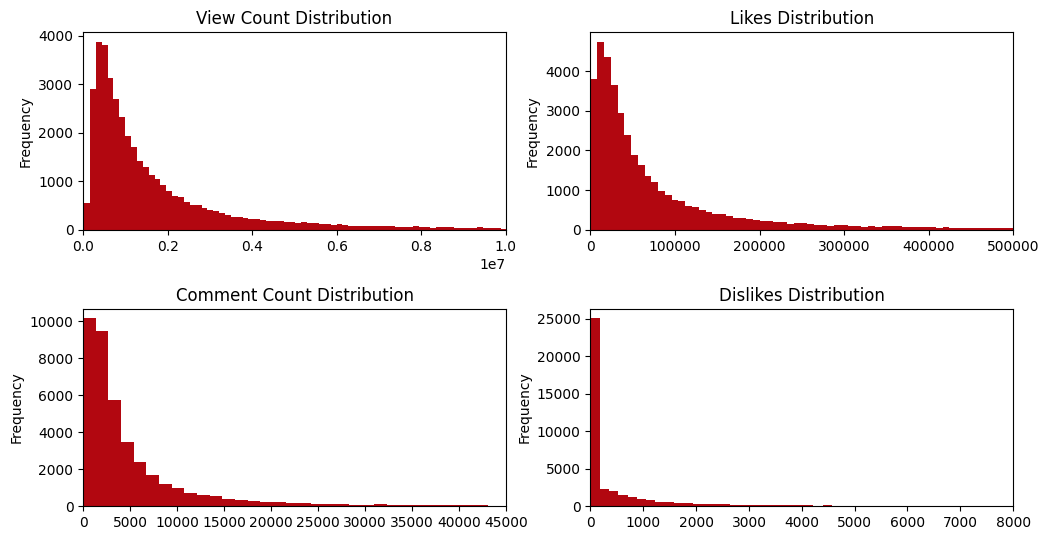

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(221)
unique_video['view_count'].plot(kind='hist',bins=2000,xlim=(0,10000000),color=custom_colors[2])
plt.title('View Count Distribution')

plt.subplot(222)
unique_video['likes'].plot(kind='hist',bins=2000,xlim=(0,500000),color=custom_colors[2])
plt.title('Likes Distribution')

plt.subplot(223)
unique_video['comment_count'].plot(kind='hist',bins=5000,xlim=(0,45000),color=custom_colors[2])
plt.title('Comment Count Distribution')

plt.subplot(224)
unique_video['dislikes'].plot(kind='hist',bins=5000,xlim=(0,8000),color=custom_colors[2])
plt.title('Dislikes Distribution')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

#### Dựa trên 4 đồ thị phân bổ về mức độ tương tác như trên, có một số nhận xét đáng chú ý sau:


- Sự phân bố của lượt Views là rất lớn trải dài từ hơn 22 nghìn đến hơn 100 triệu Views, tuy nhiên nhóm nhận thấy lượt Views trong nhóm từ 0-10 triệu Views chiếm đa số, gần như đa số lượt video của tập dữ liệu.
- Sự phân bố của lượt Likes: ta có thể thấy được từ 300,000 likes thì tập dữ liệu bắt đầu có sự phân hóa thành hai miền, bên phải chiếm rất nhiều videos có lượt likes nhỏ hơn 300,000. Bên phía còn lại thì chiếm ít hơn.
- Sự phân bố của lượt Comments: nhìn chung có thể thấy được số lượng của lượt bình luận dao động trong khoảng từ 0- hơn 25000 lượt. Khoảng dao động chiếm đại đa số là từ dưới 15000 comments.
- Sự phân bố của lượt Dislikes: Từ 12/11/2021, Youtube thực hiện ẩn lượt dislike video trên Youtube. Do đó, số lượng video pushlish từ sau khoảng thời gian này sẽ hiển thị số dislike=0, cụ thể có 23805 giá trị này. Điều này dẫn tới data về số lượng dislike không còn đầy đủ và chính xác, do đó trong cái phân tích tiếp theo nhóm sẽ chỉ tập trung vào view, like và comment để đánh giá video trending trên youtube.


### Correlation between numerical data

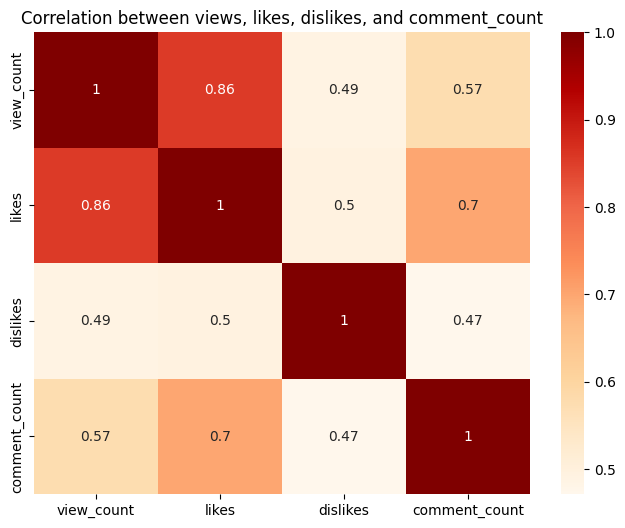

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(unique_video[['view_count','likes','dislikes','comment_count']].corr(), annot=True, cmap='OrRd')
plt.title('Correlation between views, likes, dislikes, and comment_count')
plt.show()

#### Dựa trên biểu đồ nhiệt về mức độ tương quan như trên, có một số nhận xét đáng chú ý sau:


Tương quan được biểu diễn dưới dạng một giá trị giữa -1 và +1 trong đó +1 biểu thị mối tương quan dương cao nhất, -1 biểu thị mối tương quan âm cao nhất và 0 biểu thị rằng không có mối tương quan.
Ví dụ, ta thấy rằng lượt xem và lượt thích có mối tương quan tích cực với giá trị tương quan là 0,86; nhóm cũng thấy một mối tương quan tích cực đáng chú ý (0,7) giữa số lượt thích và số bình luận.
Từ đó, hiểu rõ hơn các mối quan hệ tương quan giữa các biến nào có ảnh hưởng sâu sắc đến nhau.


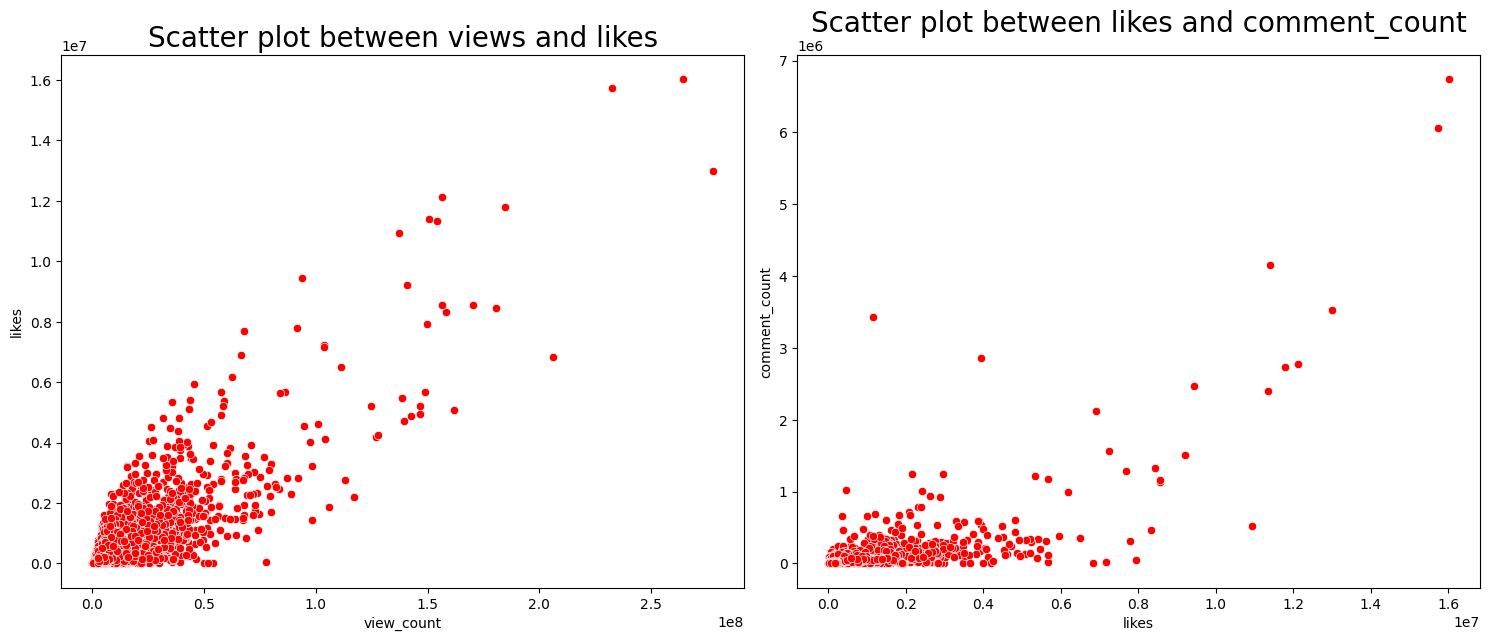

In [ ]:
# draw 2 scatter plot between view count and likes, likes and comment_count
plt.figure(figsize=(15,13))
plt.subplot(2,2,1)
sns.scatterplot(x='view_count', y='likes', data=unique_video, color=custom_colors[3])
plt.title('Scatter plot between views and likes', size=20)

plt.subplot(2,2,2)
sns.scatterplot(x='likes', y='comment_count', data=unique_video, color=custom_colors[3])
plt.title('Scatter plot between likes and comment_count', size=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.show()


#### Dựa trên 2 đồ thị phân bổ về mức độ tương quan trên, có một số nhận xét đáng chú ý sau:
- Về lượt views và lượt likes: có thể nhìn thấy rõ mật độ điểm trên đồ thị đều ở cùng một khu vực cụ thể, và khi tăng biến của views thì biến của likes cũng tăng theo và phân tán dần. Từ đó, có thể cho rằng giữa lượt likes và views có mối quan hệ tương quan với nhau.
- Về lượt comments và lượt likes: các mật độ điểm tập trung cùng một khu vực nhưng không đồng đều giữa 2 biến trong đồ thị, khi biến likes tăng thì biến comments lại không tăng hoặc tăng rất ít và các điểm hầu như phân tán. Từ đó có thể đánh giá giữa lượt comments và lượt likes có mối tương quan không quá mật thiết.


In [ ]:
#calculate like per view
unique_video['like_per_view'] = unique_video['likes'] / unique_video['view_count']
#calculate comment per view
unique_video['comment_per_view'] = unique_video['comment_count'] / unique_video['view_count']

# find the overall average likes and comments per view
averageLikesPerView = unique_video['like_per_view'] .mean()
averageCommentsPerView = unique_video['comment_per_view']  .mean()


print("On average, trending videos got " + str(round(averageLikesPerView, 4)) + " likes per view.")
print("On average, trending videos got " + str(round(averageCommentsPerView, 4)) + " comments per view.")

On average, trending videos got 0.0486 likes per view.
On average, trending videos got 0.0038 comments per view.


## 6 Text data

### Title lenght distribution

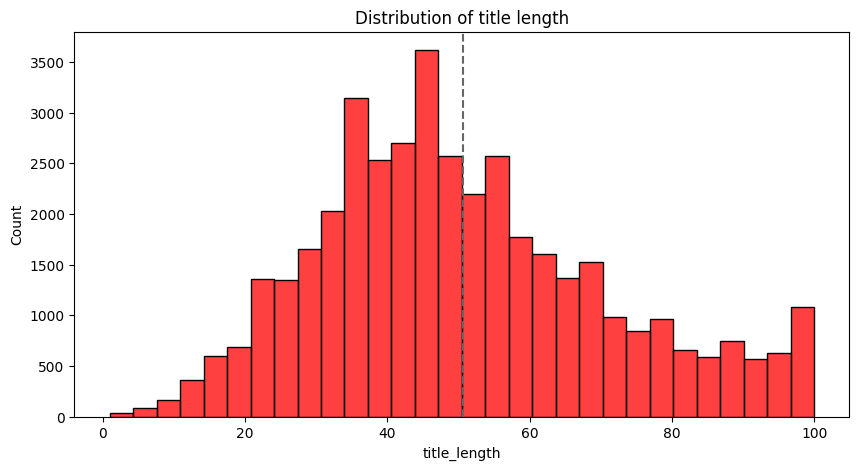

In [ ]:
# Distribution of title length
unique_video['title_length'] = unique_video['title'].apply(lambda x: len(x))
plt.figure(figsize=(10,5))
sns.histplot(unique_video.title_length, bins=30, color=custom_colors[3])
# add the vertical line for the average title length
plt.axvline(x=unique_video['title_length'].mean(), color=custom_colors[1], linestyle='--')
#sns.distplot(unique_video['title_length'], bins=50, color=custom_colors[3])
plt.title('Distribution of title length')
plt.show()

Tiếp theo, nhóm sẽ phân tích độ dài của video title của một trending video thường có độ dài bao nhiêu và có ảnh hưởng đến lựa chọn của người xem như thế nào. Ta có thể thấy độ dài tiêu đề video và số lượng videos ở Youtube Treding có tiêu đề khá dài, dao động mạnh từ 20-100 từ và giá trị trung bình = 50

### Word cloud for title and tags

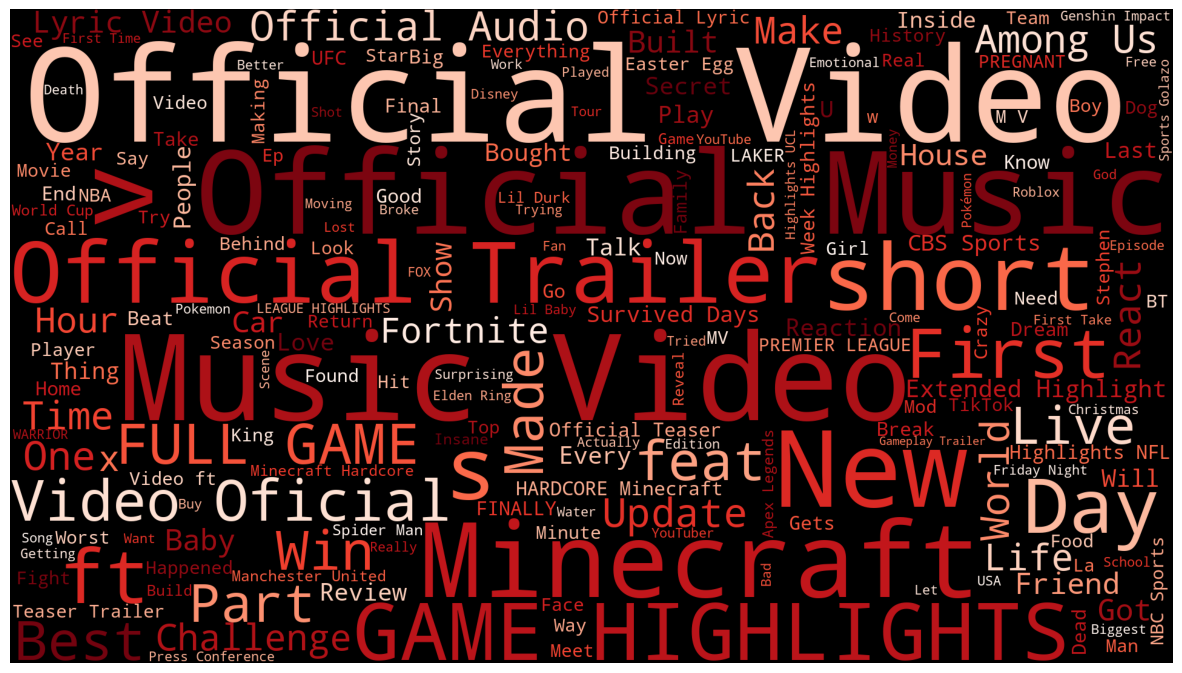

In [ ]:
# Create wordcloud for title description
from wordcloud import WordCloud
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080,
                          colormap='Reds',
                         ).generate(" ".join(unique_video.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Nhóm tiến hành vẽ Wordcloud cho title để thể hiện mức độ phổ biến của các từ được sử dụng thường xuyên trong các video trending của Youtube. Từ title của tập dữ liệu, ta có thể thấy một số từ xuất hiện rất nhiều lần như “Music, Video, Official, Trailer, Game” đây đều là những từ thuộc các videos thuộc nhóm lĩnh vực Giải trí và âm nhạc, trò chơi.

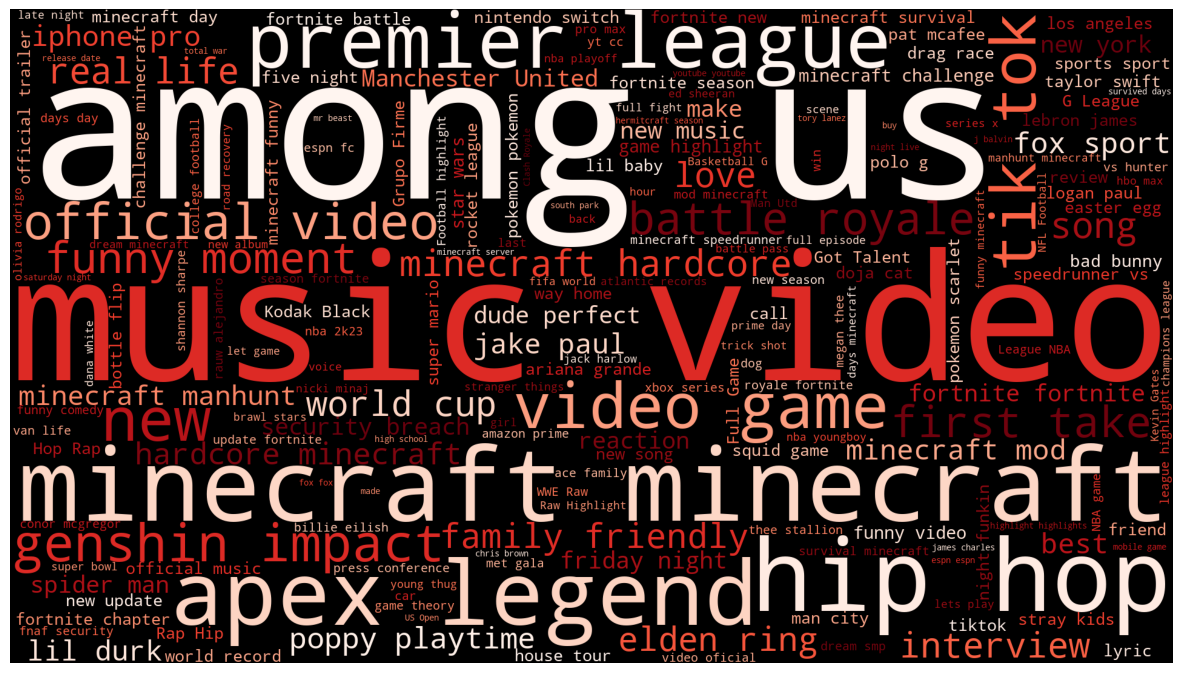

In [ ]:
#wordcloud for tags
#remove word 'None' from tags
unique_video['tags'] = unique_video['tags'].apply(lambda x: x.replace('None',''))
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080,
                          colormap='Reds',
                         ).generate(" ".join(unique_video.tags))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Sau đó ta tiến hành vẽ Wordcloud cho tag để thể hiện mức độ phổ biến của các từ được sử dụng thường xuyên trong các video trending của Youtube.
Từ title của tập dữ liệu, ta có thể thấy một số từ xuất hiện rất nhiều lần như “Among us, hip hop, music video, apex legend, tik tok” đây đều là những tag thuộc các videos thuộc nhóm lĩnh vực Giải trí và âm nhạc.


# Kết luận về kết quả phân tích


### Đề tài “Phân tích dữ liệu trending YouTube” đã thu thập dữ liệu bằng ngôn ngữ Python và tiến hành làm sạch dữ liệu. Sau đó, nhóm tiến hành trực quan hóa dữ liệu bằng các biểu đồ, từ đó đưa ra các phân tích về dữ liệu.
1.
Từ biểu đồ trên có thể thấy các video thuộc Top 10 có số lượt xem từ 150 triệu đến 280 triệu. Trong đó, 3 video có số lượt xem cao nhất lần lượt là "Pink Venom" (BlackPink) (280 triệu), "Butter" (BTS) (270 triệu) và "Dynamite" (BTS) với 230 triệu lượt xem. Các video trên đồng thời cũng là top 3 video có số lượt like cao nhất.
Top 3 MV "7 Days Stranded At", "India claim stunning series win, end Australia's Gabba streak", "Every Country On Earth Fights For $250,000!" là các MV có thời gian trending lâu nhất với thời gian nằm trên top trending là 37 ngày. Các video còn lại trong top 10 có thời gian trending trung bình kéo dài trong vòng 35 ngày.
Thời gian lên xu hướng của các video phần lớn nằm trong khoảng từ 0 - 5 ngày. Trong đó, các video lên xu hướng trong vòng từ 1 ngày chiếm số lượng nhiều nhất. Thời gian nằm trên top trending của các video rơi vào khoảng  0 - 12 ngày. Trong đó, phân lớn các video nằm trên Top thịnh hành trong vòng 5 ngày.

2.
Số lượng video xuất bản từ năm 2020 - 2023 thay đổi liên tục và không đồng đều. Số lượng video được phát hành tăng mạnh từ 2020 - 2021. Từ năm 2021 - 2022, mặc dù có tăng nhưng không mạnh mẽ như các năm trước.
Khi so sánh giữa các ngày khác nhau trong tuần, số lượng các video được phát hành chênh lệch không quá nhiều. Thứ 6 là ngày có số lượng video phát hành nhiều nhất với 6704 video. Có thể thấy, khi phát hành vào thứ 6, video sẽ được tiếp cận và xem nhiều hơn do sau đó là cuối tuần, người xem có nhiều thời gian rảnh và có nhu cầu giải trí cao. Khi so sánh giữa các thời điểm 1 video mới ra đời trong vòng 1 ngày, số lượng video mới xuất bản vào lúc 16 giờ chiếm nhiều nhất với khoảng 22000 video.

3.
Top 10 kênh có số lượng trending video nhiều nhất rơi vào khoảng 80 đến 370 video. Trong đó, Top 3 các kênh có số lượng video trending nhiều nhất đều là các kênh thể thao. Cụ thể là NBA (370 video), tiếp theo là NFL (350 video) và NBC Sport (150 video).
Top 10 các kênh Youtube tổng lượt xem cao nhất rơi vào khoảng 700 triệu lượt xem đến 3 tỷ 500 triệu lượt xem. Top 3 các kênh truyền hình có tổng số lượt xem cao nhất lần lượt là MrBeast (3.5 tỷ lượt xem), Blackpink (2 tỷ lượt xem) và Hype Labels (1.9 tỷ lượt xem). Mặc dù có sự thay đổi về thứ hạng, 3 kênh truyền hình này vẫn là các kênh truyền hình dẫn đầu có tổng số lượt view nằm trong top cao nhất đều đặn qua các năm. Riêng năm 2023, "BlackPink" trượt khỏi top 3 và nhường vị trí lại có cho "DaFuqBoom!"

4.
Những thể loại video như Gaming, Entertainment và Music có số lượng video lớn, với Gaming là thể loại phổ biến nhất với hơn 8000 video.
Số lượng video của mỗi category có sự chênh lệch, vậy nên nhóm sẽ lấy giá trị trung bình để đánh giá.
Tùy thuộc vào sở thích và hành vi của người xem: Mức độ tương tác trong các lĩnh vực khác sẽ phụ thuộc vào nhiều yếu tố, bao gồm đối tượng mục tiêu, nội dung và phong cách thực hiện.

5.
Sự phân bố của lượt Views là rất lớn trải dài từ hơn 22 nghìn đến hơn 100 triệu Views, ta có thể thấy được từ 300,000 likes thì tập dữ liệu bắt đầu có sự phân hóa thành hai miền, số lượng của lượt bình luận dao động trong khoảng từ 0- hơn 25000 lượt.
Có một mối tương quan tích cực rất mạnh giữa số lượt xem và số lượt thích của các Videos trending: Khi một trong số chúng tăng, số khác cũng đồng thời tăng và ngược lại.
Có một mối tương quan không quá mật thiết giữa số lượt thích và số lượng bình luận.

6.
Những video thường có độ dài tiêu đề video nằm trong khoảng 15 đến dưới 100 từ, đại đa số là 50 từ.
Các cụm từ như “Music, Video, Official, Trailer, Game” rất phổ biến trong tiêu đề các video. Và một số từ xuất hiện rất nhiều lần như “Among us, hip hop, music video, apex legend, tik tok” đây đều là những tag thuộc các videos thuộc nhóm lĩnh vực Giải trí và âm nhạc.
